In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style("whitegrid")

In [152]:
ccs = pd.read_excel("Credit Card Customer Data.xlsx")

In [153]:
ccs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [154]:
ccs.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [155]:
ccs.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [156]:
ccs.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [157]:
ccs[ccs.duplicated()]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [158]:
ccs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


### Univariate Analysis

<AxesSubplot:xlabel='Avg_Credit_Limit'>

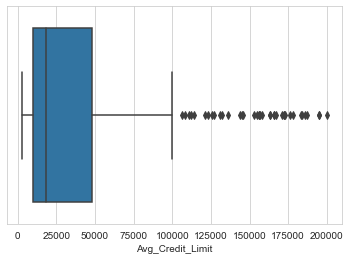

In [159]:
sns.boxplot(x=ccs['Avg_Credit_Limit'])

<AxesSubplot:xlabel='Avg_Credit_Limit'>

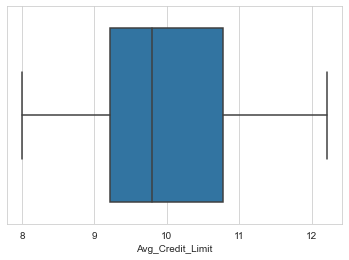

In [160]:
ccs['Avg_Credit_Limit'] = np.log(ccs['Avg_Credit_Limit'])
sns.boxplot(x=ccs['Avg_Credit_Limit'])

<AxesSubplot:xlabel='Total_Credit_Cards'>

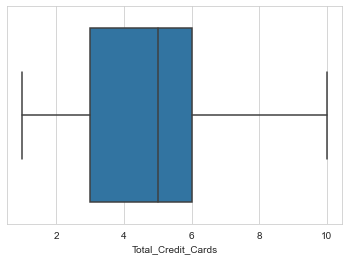

In [161]:
sns.boxplot(x=ccs['Total_Credit_Cards'])

<AxesSubplot:xlabel='Total_visits_bank'>

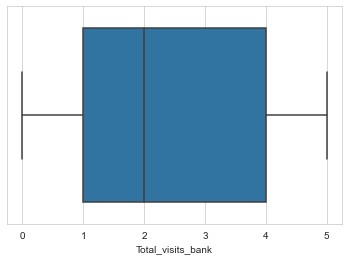

In [162]:
sns.boxplot(x=ccs['Total_visits_bank'])

<AxesSubplot:xlabel='Total_visits_online'>

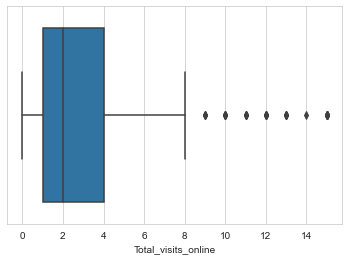

In [163]:
sns.boxplot(x=ccs['Total_visits_online'])

In [164]:
ccs['Total_visits_online'].value_counts().sort_index()

0     144
1     109
2     189
3      44
4      69
5      54
6       1
7       7
8       6
9       4
10      6
11      5
12      6
13      5
14      1
15     10
Name: Total_visits_online, dtype: int64

In [165]:
ccs.loc[ccs['Total_visits_online'] >= 6,'Total_visits_online'] = round(np.mean(ccs['Total_visits_online']))

In [166]:
ccs['Total_visits_online'].value_counts().sort_index()

0    144
1    109
2    189
3     95
4     69
5     54
Name: Total_visits_online, dtype: int64

<AxesSubplot:xlabel='Total_visits_online'>

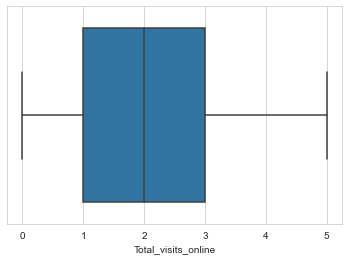

In [167]:
#ccs['Total_visits_online'] = np.log(ccs['Total_visits_online'])
sns.boxplot(x=ccs['Total_visits_online'])

<AxesSubplot:xlabel='Total_calls_made'>

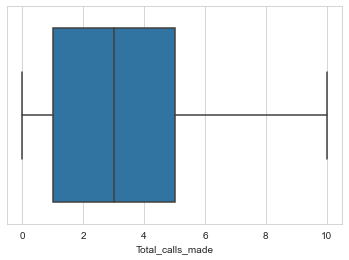

In [168]:
sns.boxplot(x=ccs['Total_calls_made'])

OBS : Outlier has been removed

### Bivariate Analysis

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_Credit_Cards'>

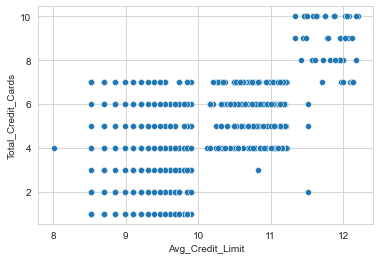

In [169]:
sns.scatterplot(x='Avg_Credit_Limit',y='Total_Credit_Cards',data=ccs)

OBS : People with more credit cards seems to have high credit limit

<AxesSubplot:xlabel='Total_Credit_Cards', ylabel='Total_visits_online'>

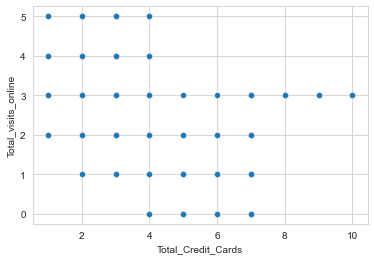

In [170]:
sns.scatterplot(x='Total_Credit_Cards',y='Total_visits_online',data=ccs)

OBS : Makes sense, people with more credit cards have visited banks mostly online

<AxesSubplot:xlabel='Total_Credit_Cards', ylabel='Total_calls_made'>

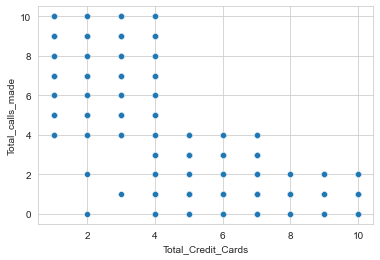

In [171]:
sns.scatterplot(x='Total_Credit_Cards',y='Total_calls_made',data=ccs)

OBS : Quite interesting, People with more credit cards have made less calls and vice versa

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_visits_online'>

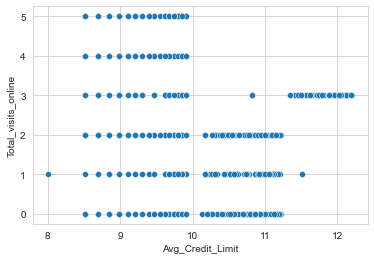

In [172]:
sns.scatterplot(x='Avg_Credit_Limit',y='Total_visits_online',data=ccs)

OBS : People with higher credit limits have visited banks online more

<AxesSubplot:xlabel='Total_calls_made', ylabel='Total_visits_online'>

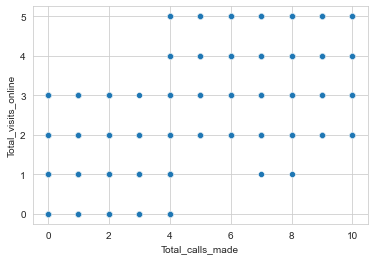

In [173]:
sns.scatterplot(x='Total_calls_made',y='Total_visits_online',data=ccs)

OBS : As expected, People who've made more calls haven't visited bank

<AxesSubplot:xlabel='Total_calls_made', ylabel='Total_visits_bank'>

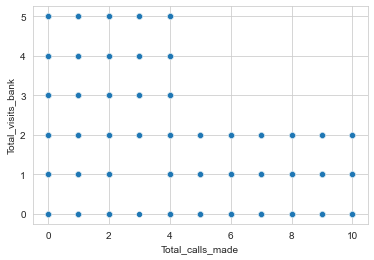

In [174]:
sns.scatterplot(x='Total_calls_made',y='Total_visits_bank',data=ccs)

OBS : This makes sense too, More the calls lesser the probability to visit the bank 

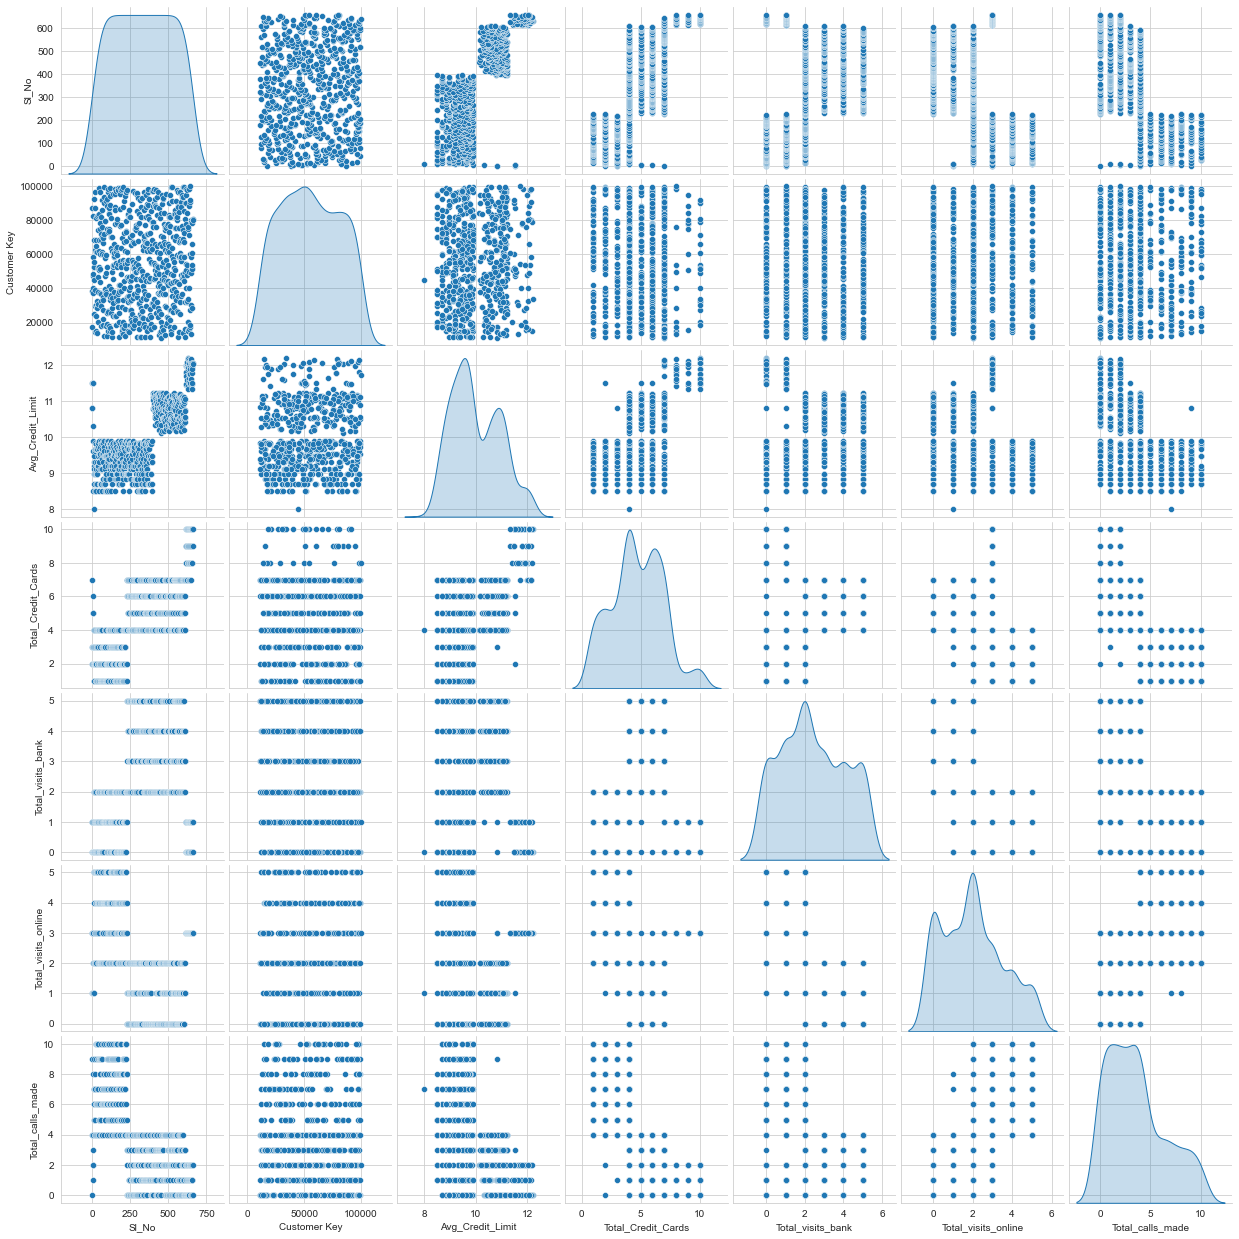

In [175]:
sns.pairplot(data = ccs,diag_kind='kde')

In [176]:
ccs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sl_No                660 non-null    int64  
 1   Customer Key         660 non-null    int64  
 2   Avg_Credit_Limit     660 non-null    float64
 3   Total_Credit_Cards   660 non-null    int64  
 4   Total_visits_bank    660 non-null    int64  
 5   Total_visits_online  660 non-null    int64  
 6   Total_calls_made     660 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 36.2 KB


In [177]:
ccs.drop('Sl_No',axis=1,inplace=True)
ccs.drop('Customer Key',axis=1,inplace=True)
ccs_final = ccs.copy()

In [178]:
ccs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_Credit_Limit     660 non-null    float64
 1   Total_Credit_Cards   660 non-null    int64  
 2   Total_visits_bank    660 non-null    int64  
 3   Total_visits_online  660 non-null    int64  
 4   Total_calls_made     660 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 25.9 KB


In [179]:
#Normalize the data

from sklearn import preprocessing

x = ccs_final.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
ccs_final = pd.DataFrame(x_scaled)

In [180]:
X = ccs_final.values

### KMeans Clustering

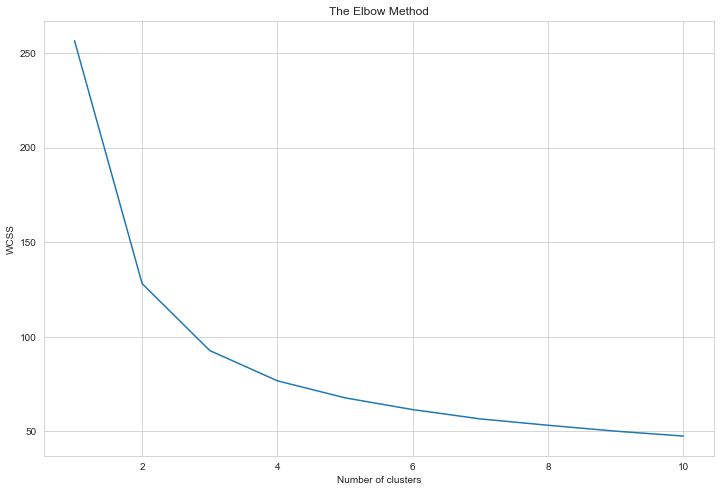

In [181]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [182]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [183]:
kmeans1 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans1.fit_predict(X)

In [184]:
ccs['group'] = y_kmeans

In [185]:
ccs['kmeans_group5'] = y_kmeans1

In [186]:
ccs.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group,kmeans_group5
0,11.512925,2,1,1,0,2,2
1,10.819778,3,0,3,9,1,1
2,10.819778,7,1,3,4,3,3
3,10.308953,5,1,1,4,2,2
4,11.512925,6,0,3,3,3,3


In [187]:
group = ccs.groupby('group')

<AxesSubplot:xlabel='group'>

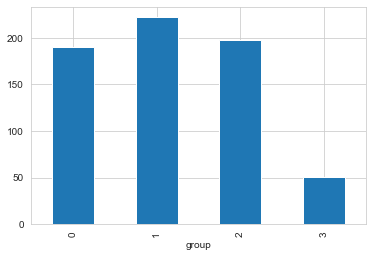

In [188]:
group.size().plot(kind='bar')

In [189]:
group.size()

group
0    190
1    222
2    197
3     51
dtype: int64

In [190]:
group.describe()['Avg_Credit_Limit']

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
0,190.0,10.065360,0.796646,8.517193,9.392662,10.239960,10.757903,11.225243
1,222.0,9.318901,0.430411,8.006368,8.987197,9.392662,9.680344,10.819778
2,197.0,10.223991,0.802058,8.517193,9.680344,10.434116,10.933107,11.512925
3,51.0,11.805793,0.291008,10.819778,11.580540,11.884489,12.037584,12.206073


In [191]:
ccs.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group,kmeans_group5
0,11.512925,2,1,1,0,2,2
1,10.819778,3,0,3,9,1,1
2,10.819778,7,1,3,4,3,3
3,10.308953,5,1,1,4,2,2
4,11.512925,6,0,3,3,3,3


<AxesSubplot:xlabel='group', ylabel='Avg_Credit_Limit'>

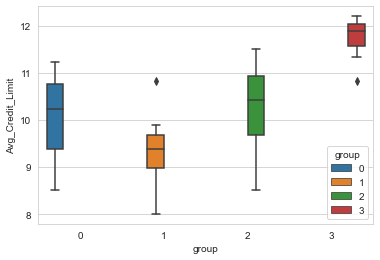

In [192]:
sns.boxplot(x='group',y='Avg_Credit_Limit',hue='group',data=ccs)

<AxesSubplot:xlabel='group', ylabel='Total_Credit_Cards'>

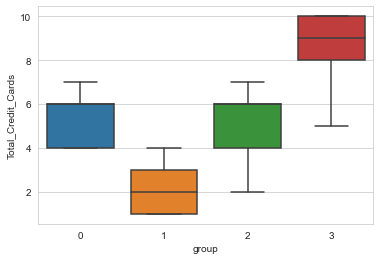

In [193]:
sns.boxplot(x='group',y='Total_Credit_Cards',data=ccs)

<AxesSubplot:xlabel='group', ylabel='Total_visits_bank'>

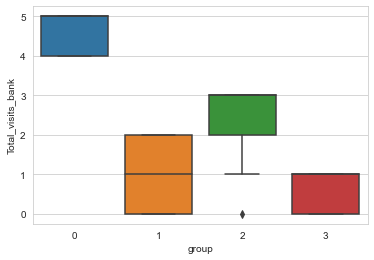

In [194]:
sns.boxplot(x='group',y='Total_visits_bank',data=ccs)

<AxesSubplot:xlabel='group', ylabel='Total_visits_online'>

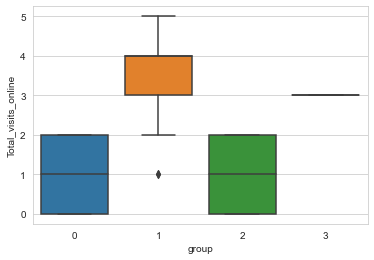

In [195]:
sns.boxplot(x='group',y='Total_visits_online',data=ccs)

<AxesSubplot:xlabel='group', ylabel='Total_calls_made'>

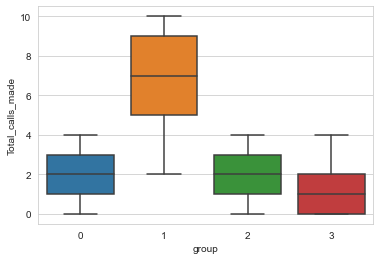

In [196]:
sns.boxplot(x='group',y='Total_calls_made',data=ccs)

<AxesSubplot:xlabel='Total_visits_online', ylabel='Total_visits_bank'>

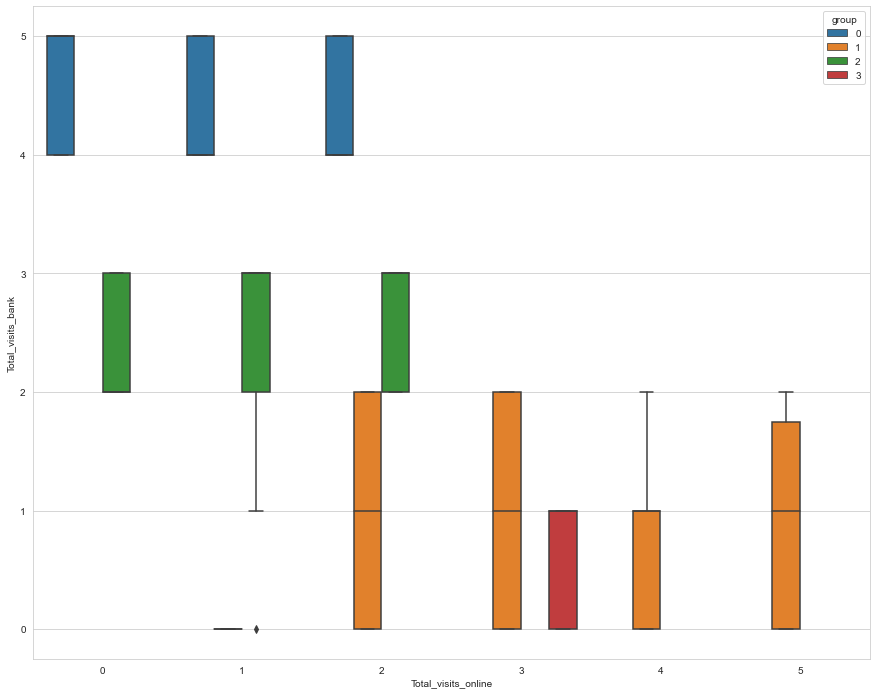

In [197]:
plt.figure(figsize=(15,12))
sns.boxplot(y='Total_visits_bank',x='Total_visits_online',hue='group',data=ccs)

<AxesSubplot:xlabel='Total_visits_online', ylabel='Total_visits_bank'>

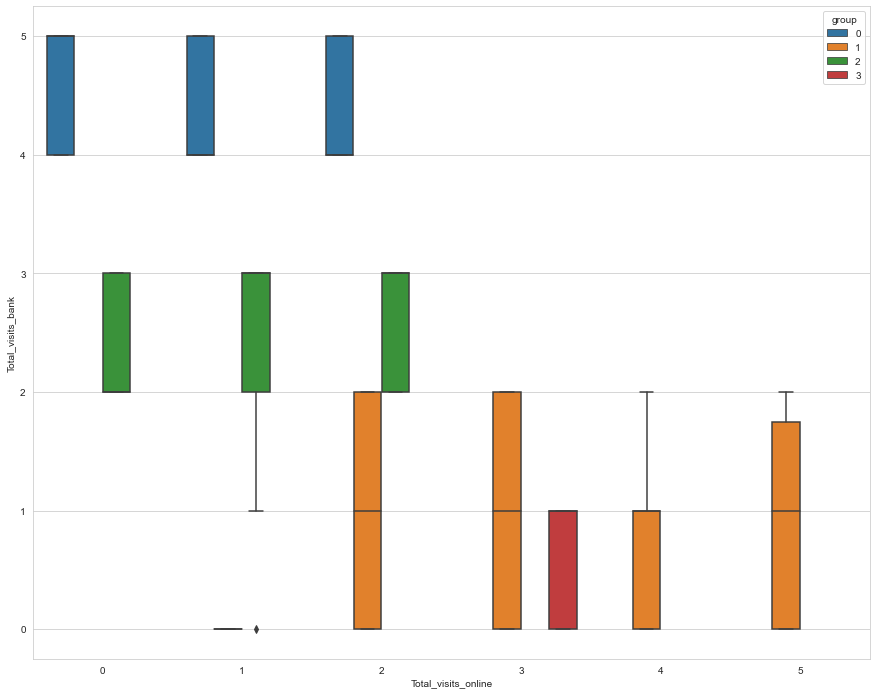

In [198]:
plt.figure(figsize=(15,12))
sns.boxplot(y='Total_visits_bank',x='Total_visits_online',hue='group',data=ccs)

In [199]:
import plotly.express as px
fig = px.scatter_3d(ccs, x='Total_visits_bank', y='Total_visits_online', z='Total_calls_made',
              color='group')
fig.show()

In [200]:
ccs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_Credit_Limit     660 non-null    float64
 1   Total_Credit_Cards   660 non-null    int64  
 2   Total_visits_bank    660 non-null    int64  
 3   Total_visits_online  660 non-null    int64  
 4   Total_calls_made     660 non-null    int64  
 5   group                660 non-null    int32  
 6   kmeans_group5        660 non-null    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 31.1 KB


### Observation

Cluster 1 : People who fall under this category have higher average credit limit and more credit cards.They seem to have very less communication with the bank both visits and by calls.

Cluster 2 : People who fall under this category have lower average limit and less credit cards. When it comes to communication, they have not visited banks much but they've visited banks online more and have called banks a lot. 

Cluster 3 : This group of people have average decent number of credit cards and average credit limit.They are just visiting banks frequently but not online.They also dont make much calls 

Cluster 4 : People who fall under this category are similar to the people from the last group. They have a bit higher average credit limit.

KeyError: 'kmeans_group'

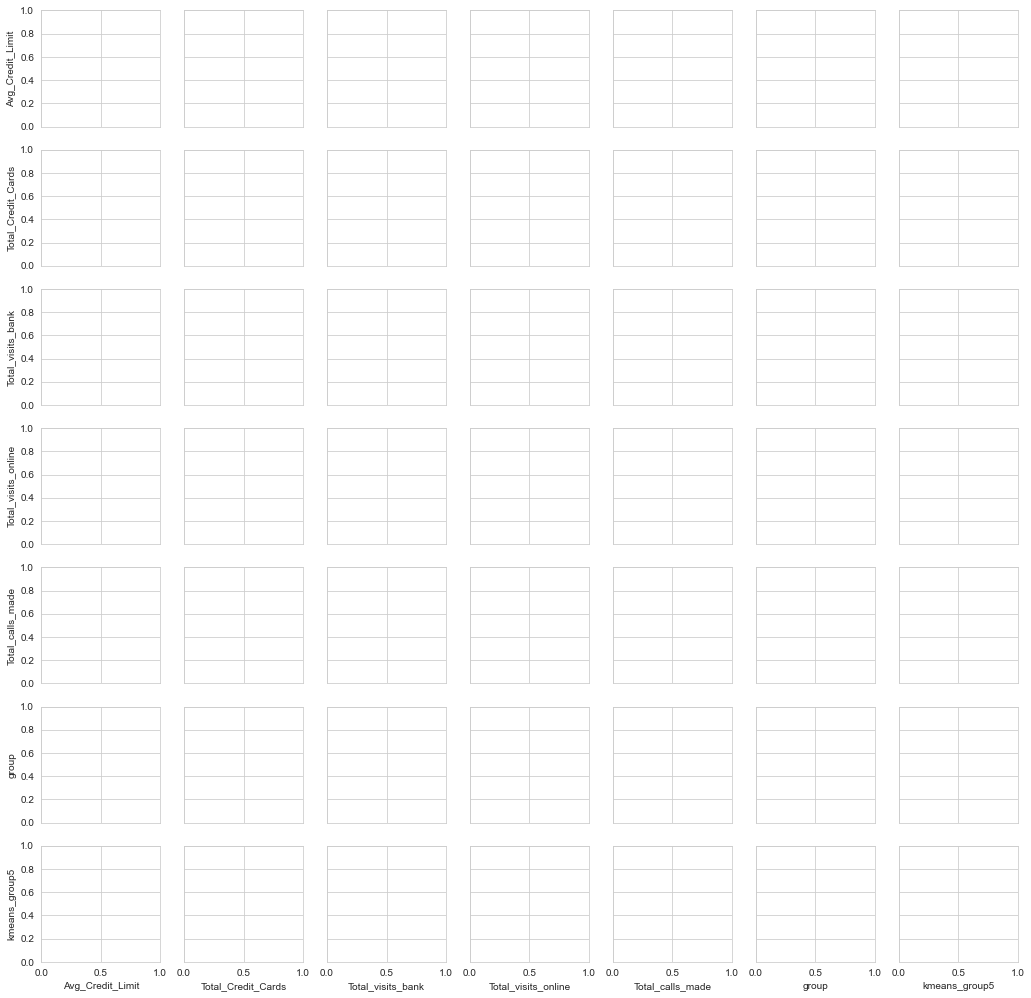

In [201]:
sns.pairplot(data = ccs,diag_kind='kde',hue='kmeans_group',palette='viridis')
plt.show()

### Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as sch
fig, axes = plt.subplots(1, figsize=(15,12))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
#plt.figure(figsize=())
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
ccs.rename(columns={'group':'kmeans_group'},inplace=True)

In [ ]:
ccs['Hier_group'] = y_hc

In [ ]:
ccs.head(10)

In [ ]:
ccs_sample = ccs.drop(['kmeans_group','Hier_group'],axis=1)

In [ ]:
sns.pairplot(data = ccs_sample,diag_kind='kde',hue='kmeans_group5',palette='viridis')
plt.show()